<a href="https://colab.research.google.com/github/atakishiyevamalak/MachineLearningProjects/blob/main/Full_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!curl -L -o global-food-prices.zip\
  https://www.kaggle.com/api/v1/datasets/download/adrianjuliusaluoch/global-food-prices

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 28.6M  100 28.6M    0     0  27.9M      0  0:00:01  0:00:01 --:--:--  236M


In [ ]:
!unzip /content/global-food-prices.zip

Archive:  /content/global-food-prices.zip
  inflating: Global WFP Food Prices.csv  


In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('/content/Global WFP Food Prices.csv')
df

,country_code,date,county,subcounty,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,price_flag,price_type,currency,local_price,price_usd
0,AFG,2000-01-15,Badakhshan,Faiz Abad,Fayzabad,266,37.12,70.58,non-food,"Wage (non-qualified labour, non-agricultural)",465,Day,actual,Retail,AFN,150000.00,3205.81000
1,AFG,2000-01-15,Balkh,Mazar-e-Sharif,Mazar,267,36.73,67.11,non-food,"Wage (non-qualified labour, non-agricultural)",465,Day,actual,Retail,AFN,100000.00,2137.21000
2,AFG,2000-01-15,Hirat,Hirat,Hirat,270,34.35,62.20,cereals and tubers,Bread,55,KG,actual,Retail,AFN,15.63,0.33000
3,AFG,2000-01-15,Hirat,Hirat,Hirat,270,34.35,62.20,cereals and tubers,Wheat,84,KG,actual,Retail,AFN,9.13,0.20000
4,AFG,2000-01-15,Hirat,Hirat,Hirat,270,34.35,62.20,cereals and tubers,Wheat flour,58,KG,actual,Retail,AFN,10.06,0.22000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109612,ZWE,2025-03-15,Mashonaland Central,Shamva,Wadzanai,8824,-17.30,31.57,non-food,Toothpaste,539,100 ML,aggregate,Retail,ZWL,40.00,0.00060
3109613,ZWE,2025-03-15,Masvingo,Chiredzi Urban,Chiredzi Urban,5532,-21.05,31.67,miscellaneous food,Salt,185,KG,aggregate,Retail,ZWL,31.50,0.00047
3109614,ZWE,2025-03-15,Masvingo,Chiredzi Urban,Chiredzi Urban,5532,-21.05,31.67,non-food,Laundry soap,540,KG,aggregate,Retail,ZWL,43.26,0.00065
3109615,ZWE,2025-03-15,Matabeleland South,Insiza,Skuta,5474,-20.46,29.61,"meat, fish and eggs",Fish (kapenta),887,KG,aggregate,Retail,ZWL,400.00,0.00600


In [ ]:
df.drop(['market', 'commodity_id', 'currency', 'local_price'], axis=1, inplace=True)

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3109617 entries, 0 to 3109616
Data columns (total 13 columns):
 #   Column        Dtype         
---  ------        -----         
 0   country_code  object        
 1   date          datetime64[ns]
 2   county        object        
 3   subcounty     object        
 4   market_id     int64         
 5   latitude      float64       
 6   longitude     float64       
 7   category      object        
 8   commodity     object        
 9   unit          object        
 10  price_flag    object        
 11  price_type    object        
 12  price_usd     float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 308.4+ MB


In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [ ]:
df.drop(['date'], axis=1, inplace=True)

In [ ]:
import matplotlib.pyplot as plt

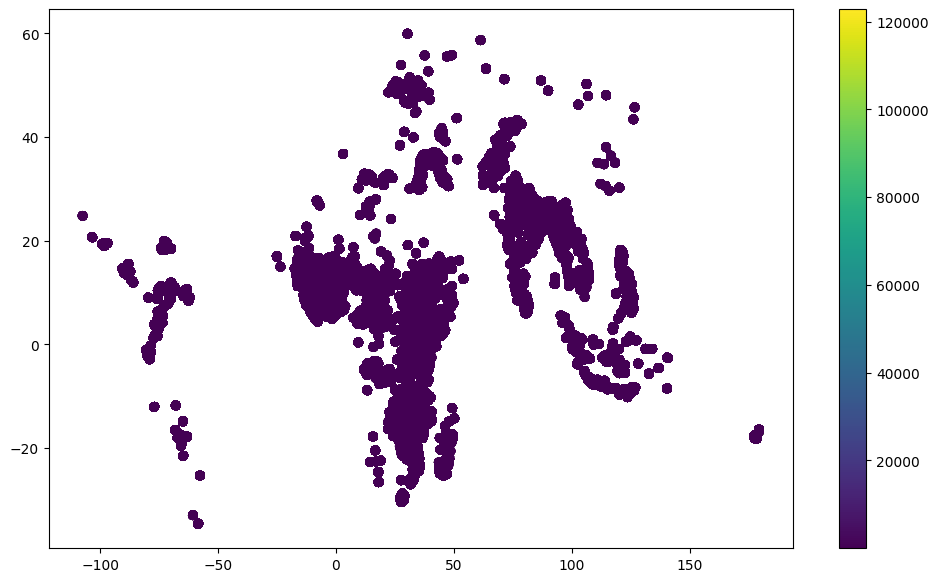

In [ ]:
plt.figure(figsize=(12, 7))
plt.scatter(x=df['longitude'],
            y=df['latitude'],
            c=df['price_usd'])
plt.colorbar()

In [ ]:
df.dropna(subset=['price_usd'], inplace=True)

In [ ]:
X = df.drop(['price_usd'], axis=1)
y = df['price_usd'].copy()

In [ ]:
import numpy as np


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
num_features = X_train.select_dtypes(include=[np.number]).columns
cat_features = X_train.select_dtypes(exclude=[np.number]).columns

In [ ]:
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

transformer = ColumnTransformer([
    ('cat', cat_pipeline, cat_features),
    ('num', num_pipeline, num_features)
], remainder='passthrough')

full_pipeline_lr = Pipeline([
    ('prepocessing', transformer),
    ('estimator', LinearRegression())
])

In [ ]:
full_pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('prepocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['country_code', 'county', 'subcounty', 'category', 'commodity', 'unit',
       'price_flag', 'price_type'],
      dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['market_id', 'latitude', 'longitude', 'year', 'month', 'day'], dtype='object'))])),
                ('estimator', LinearRegression())])

In [ ]:
print(f'train score: {full_pipeline_lr.score(X_train,y_train)}\ntest  score: {full_pipeline_lr.score(X_test,y_test)}')

train score: 0.7310482315163492
test  score: 0.7724799201616164


In [ ]:
full_pipeline_rfr = Pipeline([
    ('prepocessing', transformer),
    ('estimator', RandomForestRegressor())
])

In [ ]:
full_pipeline_rfr.fit(X_train, y_train)

In [ ]:
print(f'train score: {full_pipeline_rfr.score(X_train,y_train)}\ntest  score: {full_pipeline_rfr.score(X_test,y_test)}')